# 딥러닝 기초

## CH4 과제

## 2020100381 안정빈

## Ch4. 신경망 학습
+ 학습: 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것
+ 학습의 목표: 손실 함수의 결괏값을 가장 작게 만드는 가중치 매개변수를 찾는 것
+ 신경망은 가중치 매개변수의 값을 데이터를 보고 자동으로 결정한다.
+ 신경망은 수천에서 수만개의 매개변수가 존재하기에, 매개 변수를 수작업이 아닌 자동으로 설정할 수 있는 것은 매우 중요하다.

### 4-1-1. 데이터 주도 학습
+ 머신러닝은 데이터에서 답을 찾고 데이터에서 패턴을 발견하고 데이터로 이야기를 만드는 것으로, 데이터가 매우 중요한 요소이다.
+ 사람은 경험과 직관을 단서로, 시행착오를 거듭하며 일을 진행한다.
+ 반면, 머신러닝에서는 사람의 개입을 최소화하고 수집한 데이터로부터 패턴을 찾으려 시도한다.
+ 신경망과 딥러닝은 기존 머신러닝에서 사용하던 방법보다 사람의 개입을 더욱 배제할 수 있게 해준다.

손 글씨 숫자를 분류하는 경우:
+ 5-> 사람이 생각한 알고리즘 -> 결과
+ 5-> 사람이 생각한 특징 추출(SIFT, HOG 등) -> 머신러닝 알고리즘(SVM, KNN) -> 결과
+ 5->신경망(딥러닝) -> 결과

즉, 머신러닝은 특징을 사람이 설계하지만, 신경망은 이미지를 있는 그대로 학습하여, 이미지에 포함된 중요한 특징까지도 '기계'가 스스로 학습한다.

이러한 특성으로 딥러닝을 종단간 머신러닝이라고도 한다.

### 4-1-2. 훈련 데이터와 시험 데이터
+ 머신러닝은 데이터를 훈련 데이터와 시험 데이터로 나눠, 훈련 데이터로 최적의 매개변수를 찾고, 시험 데이터로 모델의 실력을 평가한다.
+ 범용 능력(아직 보지 못한 데이터로도 문제를 풀어내는 능력)을 평가하기 위해 데이터를 분할
+ 훈련 데이터에만 지나치게 최적화된 상태(과대 적합)여부를 확인, 과대적합을 피하는 것은 머신러닝의 중요한 과제이다.

### 4-2. 손실함수
+ 신경망 학습에서는 현재의 상태를 '하나의 지표'로 표현한다. 그리고 그 지표를 가장 좋게 만들어주는 가중치 매개변수의 값을 탐색한다.
+ 이 때 신경망 학습에서 사용하는 지표를 손실 함수라고 한다. 일반적으로 SSE(오차제곱합)과 교차 엔트로피 오차를 사용한다.
+ 손실 함수는 신경망의 성능의 '나쁨'을 나타내는 지표로, 현재의 신경망이 훈련 데이터를 얼마나 잘 처리하지 '못' 하느냐를 나타낸다.

### 4-2-1. 오차제곱합
오차 제곱합: (신경망의 출력-정답 레이블)의 제곱을 모두 더하고 2로 나눈 값

In [30]:
import numpy as np 

y=[0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0] # 배열의 원소는 첫 번째 인덱스부터 순서대로 숫자 '0','1','2'...일 때의 값
# y는 소프트맥스 함수의 출력 
t=[0,0,1,0,0,0,0,0,0,0] # 정답을 가리키는 위치의 원소는 1, 그 외에는 0으로 표시
# t처럼 한 원소만 1, 나머지 원소는 0으로 나타내는 표기법을 원-핫 인코딩이라 함.

def sum_squares_error(y,t): # SSE
    return 0.5 * np.sum((y-t)**2)

print(sum_squares_error(np.array(y),np.array(t)))

y=[0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0] # 7d일 확률이 가장 높다고 추정함(0.6)
print(sum_squares_error(np.array(y),np.array(t)))

0.09750000000000003
0.5975


첫 번째의 예는 정답이 2고 신경망의 출력도 2에서 가장 높은 경우, 두번째 예는 정답이 2지만, 신경망의 출력은 7에서 가장 높다.

그렇기에 첫 번째 예시의 손실 함수 출력값이 작으며, 정답 레이블과의 오차도 작다는 것을 알 수 있다.

-> 오차제곱합 기준으로 첫 번째 추정 결과가 오차가 더 작으므로 정답에 더 가까울 것으로 판단 할 수 있다.

### 4-2-2. 교차 엔트로피 오차
정답일 때의 추정의 자연로그를 계산하는 식 
ex) 정답 레이블이 2이고, 신경망의 출력이 0.6이라면 교차 엔트로피 오차는 -log0.6=0.51이 된다. / 같은 조건에서 신경망 출력이 0.1이라면 -log0.1=2.30

-> 교차 엔트로피 오차는 정답일 때의 출력이 전체 값을 정한다.

In [31]:
def cross_entropy_error(y,t):
    delta=1e-7
    return -np.sum(t*np.log(y+delta))

t=[0,0,1,0,0,0,0,0,0,0]
y=[0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
print(cross_entropy_error(np.array(y),np.array(t)))

y=[0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
print(cross_entropy_error(np.array(y),np.array(t)))

0.510825457099338
2.302584092994546


정답일 때의 출력이 높을 때, 엔트로피 오차가 적게 나온다. -> 결과가 더 작은 첫 번째 추정이 정답일 가능성이 높다고 판단할 수 있다.

### 4-2-3. 미니배치 학습
+ 머신러닝 문제는 훈련 데이터에 대한 손실 함수의 값을 구하고, 그 값을 최대한 줄여주는 매개변수를 찾는다.
+ 모든 훈련 데이터를 대상으로 손실 함수 값을 구해야 함
+ 훈련 데이터가 100개라 가정, 그로부터 계산한 100개의 손실 함수 값들의 합을 지표로 삼는다.
+ 그러나 데이터가 많을 경우, 모든 데이터를 대상으로 손실 함수를 계산하는 것은 현실적이지 않다.
-> 데이터 일부를 추려 전체의 '근사치'로 이용. 일부 데이터(미니 배치)를 이용해 학습한다. 이러한 학습 방법을 미니배치 학습이라 한다.

In [32]:
import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))
from dataset.mnist import load_mnist 

(x_train, t_train),(x_test,t_test)= \
    load_mnist(normalize=True, one_hot_label=True) 
# normalize: 입력 이미지의 픽셀값을 0~1.0 사이로 정규화 시킬 것인지 여부/ one_hot_label: 정답 위치의 원소만 1이고 나머지가 0으로 처리할 것인지 여부

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [33]:
train_size=x_train.shape[0]
batch_size=10
batch_mask=np.random.choice(train_size, batch_size) # 지정한 범위의 수 중 무작위로 원하는 개수만 꺼내는 함수
# ex) np.random.choice(6000,10) 0이상 6000미만의 수 중에서 무작위로 10개 추출
x_batch=x_train[batch_mask]
t_batch=t_train[batch_mask]

In [34]:
np.random.choice(60000,10)

array([26816, 21942, 39576,  6827, 13897, 10160, 52587, 22908, 22769,
        1397], dtype=int32)

### 4-2-4. (배치용) 교차 엔트로피 오차 구현하기

In [35]:
def cross_entropy_error(y,t):
    if y.ndim==1:
        t=t.reshape(1, t.size) # t: 정답 레이블
        y=y.reshape(1, y.size) # y: 신경망의 출력 

    batch_size=y.shape[0]
    return -np.sum(t*np.log(y+1e-7)) / batch_size
# reshape 함수로 데이터의 형상을 바꿔주고, 배치의 크기로 나눠 정규호하고 이미지 1장당 평균의 교차 엔트로피 오차를 계산

In [36]:
# 정답 레이블이 원-핫 인코딩이 아닌 숫자 레이블로 주어졌을 때의 교차 엔트로피 오차

def cross_entropy_error(y,t):
    if y.ndim==1:
        t=t.reshape(1, t.size) 
        y=y.reshape(1, y.size)

    batch_size=y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size),t] + 1e-7)) / batch_size
# 정답에 해당하는 신경망의 출력만으로 교차 엔트로피 오차를 계산 

### 4-2-5. 왜 손실 함수를 설정하는가?
+ 신경망 학습에서는 최적의 매개변수를 탐색할 때 손실 함수의 값을 가능한 적게 하는 매개변수의 값을 찾는데,
+ 이때 매개변수의 미분(기울기)를 계산하고 그 미분 값을 단서로 매개변수의 값을 서서히 갱신하는 과정을 반복한다.
+ 만일, 미분 값이 음수면 그 가중치 매개변수를 양의 방향으로 변화시켜 손실 함수의 값을 줄일 수 있다
+ 반대로 미분 값이 양수면 그 가중치 매개변수를 음의 방향으로 변화시켜 손실 함수의 값을 줄일 수 있다.
+ 미분 값이 0이면 가중치 매개변수를 움직여도 손실 함수의 값이 줄어들지 않는데, 정확도를 지표로 하면 매개변수의 미분이 0이 되는 문제가 생긴다.

### 4-3-1. 미분
+ 경사법에서는 기울기(경사) 값을 기준으로 나아갈 방향을 정한다.
+ 미분이란 '특정 순간'의 변화량을 뜻한다. ex)직전 1분에 달린 거리, 직전 1초에 달린 거리 등 간격을 줄여 한순간(어느 순간의 속도) 확인

In [37]:
# 나쁜 구현 예시 
def numerical_diff(f,x): # 수치 미분
    h=1e-50
    return (f(x+h)-f(x))/ h


In [38]:
print(np.float32(1e-50))

0.0


x의 '작은 변화'가 함수 f(x)를 얼마나 변화시키느냐를 의미하는 코드

이때 시간을 뜻하는 h를 한없이 0에 가깝게 만든다.

잘못된 점:
+ h에 가급적 작은 값을 대입하기 위해 설정한 1e-50이라는 작은 값은 반올림 오차 발생

  반올림 오차는 작은 값(소수점 8자리 이하)가 생략되어 최종 계산 결과에 오차가 생기게 함.

  -> h값을 10의 -4승으로 변경 
+ 진정한 미분은 x 위치의 함수의 기울에 해당하나, 위의 구현에서의 미분은 (x+h)와 x 사이의 기울기에 해당 

  -> 이 오차를 줄이기 위해 (x+h)와 (x-h)일 때의 함수 f의 차분을 계산하는 방법 사용

  이 차분은 x를 중심으로 그 전후의 차분을 계산한다는 의미에서 중심 차분, 중앙 차분이라 부름.

In [39]:
# 개선
def numerical_diff(f,x):
    h=1e-4
    return (f(x+h) - f(x-h)) / (2*h)

### 4-3-2.수치 미분의 예

아주 작은 차분으로 미분하는 것을 의미



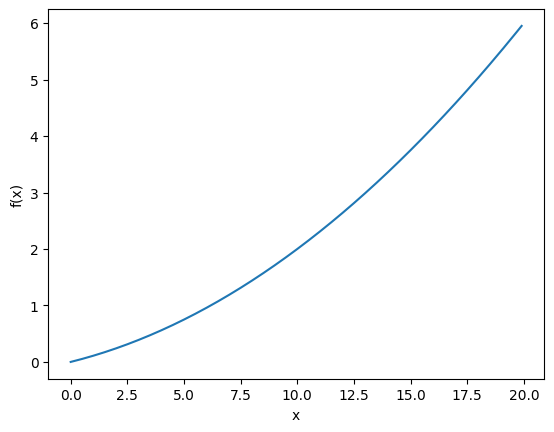

In [40]:
# y=0.01x²+0.1x 식 미분

def function_1(x):
    return 0.01*x**2 + 0.1*x

import matplotlib.pyplot as plt 

x=np.arange(0.0,20.0,0.1) # 0에서 20까지 0.1 간격의 배열 x 생성 , 20은 미포함
y=function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

In [41]:
# x=5일때 미분 값
print(numerical_diff(function_1, 5))
# x=10일때 미분 값
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


위에서 계산한 미분 값이 x에 대한 f(x)의 변화량, 즉 함수의 기울기이다.

x가 5와 10일 때의 '진정한 미분'은 0.2와 0.3으로, 앞의 수치 미분과 결과를 비교하면, 그 오차가 매우 작은 것을 확인 할 수 있다.

### 4-3-3. 편미분

변수가 여럿인 함수에 대한 미분

+ 변수가 하나인 미분과 마찬가지로 특정 장소의 기울기를 구한다.
+ 단, 여러 변수 중 목표 변수 하나에 초점을 맞추고 다른 변수는 값을 고정한다.

In [42]:
# 인수 x는 넘파이 배열이라 가정. 넘파이 배열의 각 원소를 제곱하고 그 합을 구하는 예시
def function_2(x):
    return x[0]**2 + x[1]**2

In [43]:
# x0=3, x1=4일때, x0에 대한 편미분

def function_tmp1(x0):
    return x0*x0 + 4.0 ** 2.0

print(numerical_diff(function_tmp1,3))

6.00000000000378


In [44]:
# x0=3, x1=4일때, x1에 대한 편미분

def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

print(numerical_diff(function_tmp2,4))

7.999999999999119


## 4-4. 기울기

모든 변수의 편미분을 벡터로 정리한 것을 의미

In [45]:
# 기울기 구현
def numerical_gradient(f,x):
    h=1e-4
    grad=np.zeros_like(x) # x와 형상이 같고, 그 원소가 모두 0인 배열 생성

    for idx in range(x.size):
        tmp_val=x[idx]

        # f(x+h) 계산
        x[idx]=tmp_val + h
        fxh1= f(x)

        # f(x-h) 계산
        x[idx]=tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
    return grad

In [46]:
# (3,4)에서의 기울기
print(numerical_gradient(function_2, np.array([3.0, 4.0])))

# (0,2)에서의 기울기
print(numerical_gradient(function_2, np.array([0.0, 2.0])))

# (3,0)에서의 기울기
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


+ 각 기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향을 의미

### 4-4-1. 경사법

+ 머신러닝 문제에서 최적의 매개변수를 찾기 위해선, 손실 함수가 최솟값이 되어야 함.
+ 그러나 매개변수 공간이 광대하여 어디가 최솟값이 되는 곳인지 알기 어려움.
+ -> 이때, 기울기를 잘 이용해 함수의 최솟값(가능한 작은 값)을 찾는 기법이 경사법
+ 각 지점에서 함수의 값을 낮추는 방안을 제시하는 지표는 기울기이다.
+ 그러나 기울기가 가리키는 곳에 정말 함수의 최솟값이 있는지, 보장하진 못한다.
+ 정리하자면, 기울어진 방향이 최솟값을 보장하진 않으나, 그 방향으로 가야 함수의 값을 줄일 수 있다.

+ 경사법은 현 위치에서 기울어진 방향으로 일정 거리만큼 이동, 이동한 곳에서도 기울기를 구하고, 기울어진 방향으로 나아감을 반복
+ 이러한 방법으로 함수의 값을 점차 줄이는 기법을 경사법이라 한다.
+ 경사의 최솟값을 찾으면 경사하강법 / 경사의 최댓값을 찾으면 경사 상승법
+ 경사법에선, 매개변수 값을 얼마나 갱신하느냐를 정하는 학습률을 이용한다. 학습률은 사전에 특정 값으로 정의해야 한다.
+ 학습률이 너무 크거나, 작으면 좋은 결과를 얻을 수 없다.



In [47]:
def gradient_descent(f, init_x, lr=0.01, step_num=100): # f:최적화 하려는 함수, init_x:초깃값, lr:학습률, step_num:반복 횟수
    x=init_x

    for i in range(step_num):
        grad=numerical_gradient(f,x)
        x-=lr * grad

    return x

In [48]:
# 초기값을 (-3.0, -4.0)으로 설정한 후 최솟값 탐색
def function_2(x):
    return x[0]**2 + x[1]**2

init_x=np.array([-3.0,4.0])
print(gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100))

[-6.11110793e-10  8.14814391e-10]


In [49]:
# 학습률이 너무 큰 예: lr=10.0
init_x=np.array([-3.0,4.0])
print(gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100))

# 학습률이 너무 작은 예: lr=1e-10
init_x=np.array([-3.0,4.0])
print(gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100))

[-2.58983747e+13 -1.29524862e+12]
[-2.99999994  3.99999992]


+ 학습률이 너무 크면 큰 값으로 발산 / 너무 작으면 거의 갱신되지 않은 채 종료

### 4-4-2. 신경망에서의 기울기

신경망 학습 역시 가중치 매개변수에 대한 손실 함수의 기울기를 구해야 함.

In [50]:
import sys, os
sys.path.append(os.path.join(os.getcwd(), 'dataset'))
from functions import softmax, cross_entropy_error
from gradient import numerical_gradient

class simpleNet: # 형상이 2x3인 가중치 매개변수 하나를 변수로 갖음
    def __init__(self):
        self.W=np.random.randn(2,3) # 정규분포로 초기화 

    def predict(self, x): # 예측을 수행하는 매서드
        return np.dot(x, self.W)

    def loss(self, x, t): # 손실 함수의 값을 구하는 매서드 x: 입력 데이터 t: 정답 레이블
        z=self.predict(x)
        y=softmax(z)
        loss = cross_entropy_error(y,t)

        return loss

In [51]:
net = simpleNet()
print(net.W) # 가중치 매개변수 
x=np.array([0.6,0.9])
p=net.predict(x)
print(p)
print(np.argmax(p)) # 최댓값의 인덱스 

t=np.array([0,0,1]) # 정답 레이블 
print(net.loss(x,t))

[[0.07903218 0.23366711 1.01431417]
 [0.83294105 0.6804663  0.47111675]]
[0.79706626 0.75261993 1.03259358]
2
0.9345066448492001


In [52]:
def f(w):
    return net.loss(x,t)

dw=numerical_gradient(f,net.W)
print(dw)

[[ 0.18621374  0.17811846 -0.36433221]
 [ 0.27932062  0.2671777  -0.54649831]]


### 4-5. 학습 알고리즘 구현하기

신경망 학습: 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정 아래의 4과정을 거침

1. 미니배치 추출: 훈련 데이터 중 일부를 무작위로 가져온 것으로 미니배치의 손실 함수 값을 줄이는 것이 목표
2. 기울기 산출: 미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다. 기울기는 손실 함수 의 값을 가장 적게 하는 방향을 제시
3. 매개변수 갱신: 가중치 매개변수를 기울기 방향으로 아주 조금 갱신
4. 반복: 1~3단계 반복

-> 데이터를 미니배치로 무작위로 선정하기 때문에 확률적 경사 하강법(SGD)이라 부름.

In [53]:
from functions import * 

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size,
                 weight_init_std=0.01):

        # 가중치 초기화
        self.params={}
        self.params['W1']=weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1']=np.zeros(hidden_size)
        self.params['W2']=weight_init_std * np.random.randn(hidden_size,output_size)
        self.params['b2']=np.zeros(output_size)

    def predict(self, x):
        W1, W2=self.params['W1'], self.params['W2']
        b1, b2=self.params['b1'], self.params['b2']

        a1=np.dot(x,W1) + b1
        z1=sigmoid(a1)
        a2=np.dot(z1,W2) + b2
        y=softmax(a2)

        return y
    # x: 입력 데이터, t: 정답 레이블 
    def loss(self, x, t):
        y=self.predict(x)

        return cross_entropy_error(y,t)

    def accuracy(self, x, t):
        y=self.predict(x)
        y=np.argmax(y, axis=1)
        t= np.argmax(t, axis=1)

        accuracy=np.sum(y==t) / float(x.shape[0])
        return accuracy

    # x: 입력 데이터, t:정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W:self.loss(x,t)

        grads={}
        grads['W1']=numerical_gradient(loss_W, self.params['W1'])
        grads['b1']=numerical_gradient(loss_W, self.params['b1'])
        grads['W2']=numerical_gradient(loss_W, self.params['W2'])
        grads['b2']=numerical_gradient(loss_W, self.params['b2'])

        return grads
    

+ params: 신경망의 매개변수를 보관하는 딕셔너리 변수, params[W1]은 1번째 층의 가중치, params['b1']은 1번 층의 편향
+ grads: 기울기 보관하는 딕셔너리 변수 매서드의 반환 값, grads['W1']은 1번째 층의 가중치 기울기, grads['b1']은 1번째 층의 편향의 기울기

In [54]:
net=TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [55]:
x=np.random.rand(100,784) # 더미 입력 데이터(100장 분량)
y=net.predict(x)

In [56]:
x=np.random.rand(100,784) # 더미 입력 데이터(100장 분량)
t=np.random.rand(100,10) # 더미 정답 레이블(100장 분량)

grads=net.numerical_gradient(x,t) # 기울기 계산 

print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


### 4-5-2. 미니배치 학습 구현하기 

In [57]:
"""
(x_train, t_train),(x_test,t_test)=load_mnist(normalize=True, one_hot_label=True)

train_loss_list=[]

# 하이퍼 파라미터
iters_num=10000 # 반복 횟수 
train_size=x_train.shape[0]
batch_size=100 # 미니배치 크기
learning_rate=0.1 # 학습률 
network=TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # 미니배치 획득 
    batch_mask=np.random.choice(train_size, batch_size)
    x_batch=x_train[batch_mask]
    t_batch=t_train[batch_mask]

    # 기울기 계산
    grad=network.numerical_gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1','b1','W2','b2'):
        network.params[key] -=learning_rate * grad[key]

    # 학습 경과 기록 
    loss=network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
"""

"\n(x_train, t_train),(x_test,t_test)=load_mnist(normalize=True, one_hot_label=True)\n\ntrain_loss_list=[]\n\n# 하이퍼 파라미터\niters_num=10000 # 반복 횟수 \ntrain_size=x_train.shape[0]\nbatch_size=100 # 미니배치 크기\nlearning_rate=0.1 # 학습률 \nnetwork=TwoLayerNet(input_size=784, hidden_size=50, output_size=10)\n\nfor i in range(iters_num):\n    # 미니배치 획득 \n    batch_mask=np.random.choice(train_size, batch_size)\n    x_batch=x_train[batch_mask]\n    t_batch=t_train[batch_mask]\n\n    # 기울기 계산\n    grad=network.numerical_gradient(x_batch, t_batch)\n\n    # 매개변수 갱신\n    for key in ('W1','b1','W2','b2'):\n        network.params[key] -=learning_rate * grad[key]\n\n    # 학습 경과 기록 \n    loss=network.loss(x_batch, t_batch)\n    train_loss_list.append(loss)\n"

미니배치 크기를 100으로 하여, 매번 6만개의 훈련 데이터에서 임의로 100개를 추린다. 그 후 100개의 미니배치를 대상으로 SGD를 수행해 매개변수를 갱신한다.

갱신 횟수를 만번으로 하여, 갱신할 때마다 훈련 데이터에 대한 손실 함수를 계산하여 그 값을 배열에 추가한다.

### 4-5-3. 시험 데이터로 평가하기

위의 코드에서 구하는 손실 함수 의 값은 훈련 데이터의 미니배치에 대한 손실 함수 값으로, 다른 데이터셋에서도 비슷한 성능이 나오는지 확인해야 한다.

In [58]:
"""
network=TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num=10000 # 반복 횟수 
train_size=x_train.shape[0]
batch_size=100 # 미니배치 크기
learning_rate=0.1 # 학습률 

train_loss_list=[]
train_acc_list=[]
test_acc_list=[]

# 1에포크당 반복 수 
iter_per_epoch=max(train_size/batch_size,1)

for i in range(iters_num):
    # 미니배치 획득 
    batch_mask=np.random.choice(train_size, batch_size)
    x_batch=x_train[batch_mask]
    t_batch=t_train[batch_mask]

    # 기울기 계산
    grad=network.numerical_gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1','b1','W2','b2'):
        network.params[key] -=learning_rate * grad[key]

    # 학습 경과 기록 
    loss=network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # 1 에포크당 정확도 계산 
    if i % iter_per_epoch==0:
        train_acc=network.accuracy(x_train, t_train)
        test_acc=network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc" + str(train_acc) +", test acc " + str(test_acc))
"""

'\nnetwork=TwoLayerNet(input_size=784, hidden_size=50, output_size=10)\n\n# 하이퍼파라미터\niters_num=10000 # 반복 횟수 \ntrain_size=x_train.shape[0]\nbatch_size=100 # 미니배치 크기\nlearning_rate=0.1 # 학습률 \n\ntrain_loss_list=[]\ntrain_acc_list=[]\ntest_acc_list=[]\n\n# 1에포크당 반복 수 \niter_per_epoch=max(train_size/batch_size,1)\n\nfor i in range(iters_num):\n    # 미니배치 획득 \n    batch_mask=np.random.choice(train_size, batch_size)\n    x_batch=x_train[batch_mask]\n    t_batch=t_train[batch_mask]\n\n    # 기울기 계산\n    grad=network.numerical_gradient(x_batch, t_batch)\n\n    # 매개변수 갱신\n    for key in (\'W1\',\'b1\',\'W2\',\'b2\'):\n        network.params[key] -=learning_rate * grad[key]\n\n    # 학습 경과 기록 \n    loss=network.loss(x_batch, t_batch)\n    train_loss_list.append(loss)\n\n    # 1 에포크당 정확도 계산 \n    if i % iter_per_epoch==0:\n        train_acc=network.accuracy(x_train, t_train)\n        test_acc=network.accuracy(x_test, t_test)\n        train_acc_list.append(train_acc)\n        test_acc_list.append(t